# The Problem Statement

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

This is an incident of **Customer Profiling** where we try to indentify which customer / customer segment will prefer to buy which product.


## Product Portfolio:

* The KP281 is an entry-level treadmill that sells for $1,500.
* The KP481 is for mid-level runners that sell for $1,750.
* The KP781 treadmill is having advanced features that sell for $2,500.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Data

In [4]:

# df = pd.read_csv('/content/drive/MyDrive/Scaler_Assignments/aerofit_treadmill.csv')
df = pd.read_csv("D:\\github_windows\\DataScience-Projects-courses\\Scaler_Academy\\Business Cases\\Probability\\aerofit_treadmill.csv")

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Data Analysis

### Initial Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [9]:
df.shape

(180, 9)

In [10]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### Initial Observations

Below are the initial observations after analysing the dataset: 

* There are no NULL value, which is always a good news. 
* There are 180 rows and 9 columns in the dataset. 
* The dataset seems to be clean overall and ready to work with.

From the Describe method, we can make the following observations : 

* The most popular product is **KP281**, which is their entry level product. 
* Majority of the buyers are **Male**. 
* The average age of the buyers is **28.7** and the maximum is 50.
* Also, the average income of people buying these products is around **53K**.
 


### Further Analysis

In [11]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [12]:
df["Education"].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

* 18 Years - Masters 
* 16 Years - Graduation
* 14 Years - First Year

In [13]:
def edu_fltr(d1):
    if d1["Education"] <= 14:
        return "College"
    elif d1["Education"] > 14 and d1["Education"] <= 16:
        return "Graduation"
    else:
        return "Masters"

In [14]:
df["Formal_Education"] = df.apply(edu_fltr, axis=1)

In [15]:
df["Age"].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [16]:
def age_fltr(d1):
    if d1["Age"] < 20:
        return "Teen"
    elif d1["Age"] >= 20 and d1["Age"] < 30:
        return "20s"
    elif d1["Age"] >= 30 and d1["Age"] < 40:
        return "40s"
    else:
        return "Above_40s"

In [17]:
df["Age_Brkt"] = df.apply(age_fltr, axis = 1)

In [18]:
df["Fitness"].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [19]:
df["Fitness"].quantile([0.15,0.50,0.75])

0.15    2.0
0.50    3.0
0.75    4.0
Name: Fitness, dtype: float64

In [20]:
def fitness_fltr(d1):
    if d1["Fitness"] <= df["Fitness"].quantile(0.15):
        return "Least_Fit"
    elif d1["Fitness"] > df["Fitness"].quantile(0.15) and d1["Fitness"] <= df["Fitness"].quantile(0.50):
        return "AVG_Fit"
    else:
        return "Fit"

In [21]:
df["Fitness_BRKT"]= df.apply(fitness_fltr, axis = 1)

In [22]:
df["Income"].quantile([0.25,0.50,0.75])

0.25    44058.75
0.50    50596.50
0.75    58668.00
Name: Income, dtype: float64

In [23]:
def inc_fltr(d1):
    if d1["Income"] < df["Income"].quantile(0.25):
        return "Lower_INC_BRKT"
    elif d1["Income"] >= df["Income"].quantile(0.25) and d1["Income"] < df["Income"].quantile(0.50):
        return "Median_INC_BRKT"
    elif d1["Income"] >= df["Income"].quantile(0.50) and d1["Income"] < df["Income"].quantile(0.75):
        return "ABV_AVG_INC_BRKT"
    else:
        return "High_INC"

In [24]:
df["INC_Brkt"] = df.apply(inc_fltr, axis = 1)

In [25]:
df.pivot_table(
    index="Product",
    columns=["INC_Brkt"],
    values= "Usage",
    aggfunc="sum",
    fill_value=0
)

INC_Brkt,ABV_AVG_INC_BRKT,High_INC,Lower_INC_BRKT,Median_INC_BRKT
Product,,,,
KP281,68,22,95,62
KP481,48,29,43,64
KP781,26,144,0,21


In [26]:
df.pivot_table(
    index="Product",
    columns=["Formal_Education"],
    values= "Usage",
    aggfunc="sum",
    fill_value=0
)

Formal_Education,College,Graduation,Masters
Product,,,
KP281,101,140,6
KP481,82,97,5
KP781,11,68,112


In [27]:
df.pivot_table(
    index = "Product",
    columns = ["Gender"],
    values = "Income", margins = True, aggfunc="sum"
)

Gender,Female,Male,All
Product,,,
KP281,1840803,1872639,3713442
KP481,1430757,1507662,2938419
KP781,515437,2502226,3017663
All,3786997,5882527,9669524


In [28]:
pd.pivot_table(
    data = df,
    index = "Product",
    columns = ["MaritalStatus"],
    values = "Income", margins = True, aggfunc="sum"
)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,2296740,1416702,3713442
KP481,1782816,1155603,2938419
KP781,1887085,1130578,3017663
All,5966641,3702883,9669524


#### Observations: 

* KP281 and KP481 are evenly distributed between the genders however Couples prefer it more than singles. 
* KP481 is mostly prefered by Men, and of them a partnered man prefers it more than single men. 


`Keeping aside the other factors at play, we can easily state that in General, Partenerd people prefer these products more than Singles.`

`Also, men are a much better target for marketing the Higher Tier products, than women. `

In [29]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Formal_Education,Age_Brkt,Fitness_BRKT,INC_Brkt
0,KP281,18,Male,14,Single,3,4,29562,112,College,Teen,Fit,Lower_INC_BRKT
1,KP281,19,Male,15,Single,2,3,31836,75,Graduation,Teen,AVG_Fit,Lower_INC_BRKT
2,KP281,19,Female,14,Partnered,4,3,30699,66,College,Teen,AVG_Fit,Lower_INC_BRKT
3,KP281,19,Male,12,Single,3,3,32973,85,College,Teen,AVG_Fit,Lower_INC_BRKT
4,KP281,20,Male,13,Partnered,4,2,35247,47,College,20s,Least_Fit,Lower_INC_BRKT


In [30]:
df_numerics = df[["Product","Gender","Education","Usage","Fitness","Income","Miles"]]
df_numerics.head()

,Product,Gender,Education,Usage,Fitness,Income,Miles
0,KP281,Male,14,3,4,29562,112
1,KP281,Male,15,2,3,31836,75
2,KP281,Female,14,4,3,30699,66
3,KP281,Male,12,3,3,32973,85
4,KP281,Male,13,4,2,35247,47


In [31]:
df_numerics.loc[:,"Gender"].where(df_numerics["Gender"]=="Female",1, inplace=True)
df_numerics.loc[:,"Gender"].where(df_numerics["Gender"]==1,0, inplace=True)

C:\Users\shash\AppData\Local\Temp\ipykernel_28572\911875436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerics.loc[:,"Gender"].where(df_numerics["Gender"]=="Female",1, inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_28572\911875436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerics.loc[:,"Gender"].where(df_numerics["Gender"]==1,0, inplace=True)


In [32]:
df_numerics.head()

,Product,Gender,Education,Usage,Fitness,Income,Miles
0,KP281,1,14,3,4,29562,112
1,KP281,1,15,2,3,31836,75
2,KP281,0,14,4,3,30699,66
3,KP281,1,12,3,3,32973,85
4,KP281,1,13,4,2,35247,47


In [33]:
df_cat = df[["Product","Gender","MaritalStatus","Formal_Education","Age_Brkt","INC_Brkt","Fitness_BRKT","Miles","Income"]]

In [34]:
df_cat.head()

,Product,Gender,MaritalStatus,Formal_Education,Age_Brkt,INC_Brkt,Fitness_BRKT,Miles,Income
0,KP281,Male,Single,College,Teen,Lower_INC_BRKT,Fit,112,29562
1,KP281,Male,Single,Graduation,Teen,Lower_INC_BRKT,AVG_Fit,75,31836
2,KP281,Female,Partnered,College,Teen,Lower_INC_BRKT,AVG_Fit,66,30699
3,KP281,Male,Single,College,Teen,Lower_INC_BRKT,AVG_Fit,85,32973
4,KP281,Male,Partnered,College,20s,Lower_INC_BRKT,Least_Fit,47,35247


In [35]:
pd.crosstab(
    df_cat.Product, [df_cat.Gender, df_cat.Age_Brkt]
)

Gender   Female                    Male                   
Age_Brkt    20s 40s Above_40s Teen  20s 40s Above_40s Teen
Product                                                   
KP281        27   9         3    1   22  11         4    3
KP481        15  12         2    0   17  10         3    1
KP781         5   2         0    0   22   6         5    0

In [36]:
pd.crosstab(
    df_cat.Product, [df_cat.Fitness_BRKT, df_cat.INC_Brkt]
)

Fitness_BRKT          AVG_Fit                                          \
INC_Brkt     ABV_AVG_INC_BRKT High_INC Lower_INC_BRKT Median_INC_BRKT   
Product                                                                 
KP281                      16        5             21              12   
KP481                      11        7              7              14   
KP781                       0        3              0               1   

Fitness_BRKT              Fit                                          \
INC_Brkt     ABV_AVG_INC_BRKT High_INC Lower_INC_BRKT Median_INC_BRKT   
Product                                                                 
KP281                       2        1              3               5   
KP481                       1        1              3               3   
KP781                       6       26              0               4   

Fitness_BRKT        Least_Fit                                          
INC_Brkt     ABV_AVG_INC_BRKT High_INC Lower_INC_BRKT Median_INC_BRKT  
Product                                                                
KP281                       5        1              6               3  
KP481                       4        1              5               3  
KP781                       0        0              0               0

In [37]:
df_cat.groupby(['Gender']).size().div(len(df))

Gender
Female    0.422222
Male      0.577778
dtype: float64

In [38]:
df_cat.groupby(['Gender','MaritalStatus'])[["Miles","Income"]].sum().div(len(df))

Miles        Income
Gender MaritalStatus                         
Female Partnered      23.850000  12955.072222
       Single         14.155556   8083.800000
Male   Partnered      38.144444  20192.933333
       Single         27.044444  12487.772222

### Visualizations

#### Bi-Variate and Univariate Analysis

In [39]:
# This is to Generate a Random Color Palette everytime the Code is run 

sns_color_pal = ["Accent", "Accent", "Blues", "Blues", "BrBG", "BrBG", "BuGn", "BuGn", "BuPu", "BuPu", "CMRmap", 
             "CMRmap", "Dark2", "Dark2", "GnBu", "GnBu",  "Greens", "Greens", "Greys", "Greys", "OrRd", "OrRd", 
             "Oranges", "Oranges",  "PRGn", "PRGn", "Paired", "Paired", "Pastel1", "Pastel1", "Pastel2",  "Pastel2", 
             "PiYG", "PiYG", "PuBu", "PuBuGn", "PuBuGn", "PuBu", "PuOr", "PuOr", "PuRd", "PuRd", "Purples", "Purples", 
             "RdBu", "RdBu", "RdGy", "RdGy", "RdPu", "RdPu", "RdYlBu", "RdYlBu", "RdYlGn", "RdYlGn", "Reds", "Reds", "Set1", 
             "Set1", "Set2", "Set2", "Set3", "Set3", "Spectral", "Spectral", "Wistia", "Wistia", "YlGn", "YlGnBu", "YlGnBu",
             "YlGn", "YlOrBr", "YlOrBr", "YlOrRd", "YlOrRd", "afmhot", "afmhot", "autumn", "autumn", "binary", "binary",
             "bone", "bone", "brg", "brg", "bwr", "bwr", "cividis","cool", "cool",  "coolwarm", "coolwarm",
             "copper", "copper", "cubehelix", "cubehelix", "flag", "flag",  "gist_earth", "gist_earth", "gist_gray", 
             "gist_gray", "gist_heat", "gist_heat", "gist_ncar",  "gist_ncar", "gistainbow", "gistainbow", "gist_stern", 
             "gist_stern", "gist_yarg",  "gist_yarg", "gnuplot", "gnuplot2", "gnuplot2", "gnuplot", "gray", "gray", "hot", 
             "hot",  "hsv", "hsv", "icefire", "icefire", "inferno", "inferno", "jet", "jet", "magma", "magma",  "mako", 
             "mako", "nipy_spectral", "nipy_spectral", "ocean", "ocean", "pink", "pink",  "plasma", "plasma", "prism", "prism", 
             "rainbow", "rainbow", "rocket", "rocket",  "seismic", "seismic", "spring", "spring", "summer", "summer", "tab10", "tab10",
             "tab20", "tab20", "tab20b", "tab20b", "tab20c", "tab20c", "terrain", "terrain", "turbo",  "turbo", "twilight", "twilight", 
             "twilight_shifted", "twilight_shifted", "viridis",  "viridis", "vlag", "vlag", "winter", "winter"]

<Axes: xlabel='Miles', ylabel='Product'>

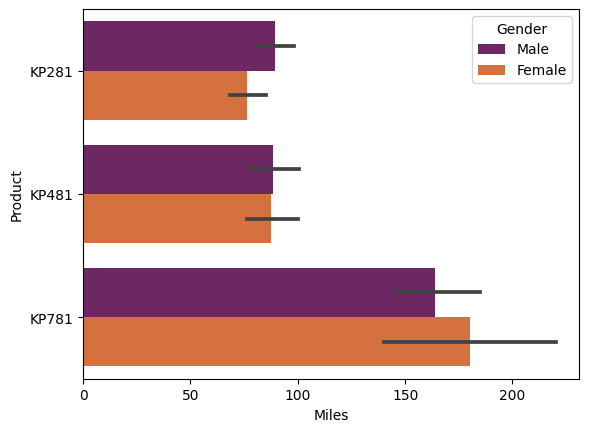

In [40]:
sns.barplot(df_cat,hue="Gender",x="Miles",y="Product",orient='h', palette=np.random.choice(sns_color_pal))

<Axes: xlabel='Miles', ylabel='Gender'>

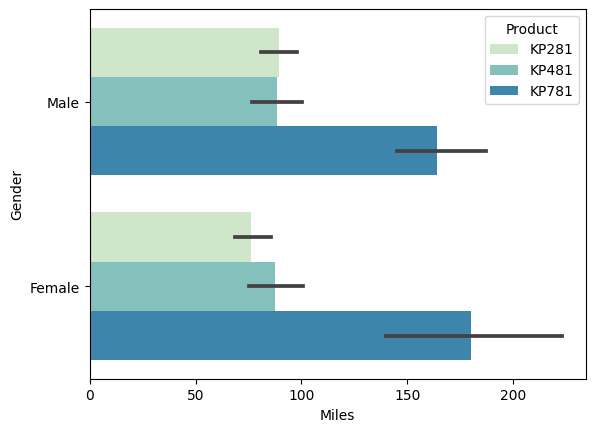

In [41]:
sns.barplot(df_cat,hue="Product",x="Miles",y="Gender",palette=np.random.choice(sns_color_pal))

<Axes: xlabel='Miles', ylabel='INC_Brkt'>

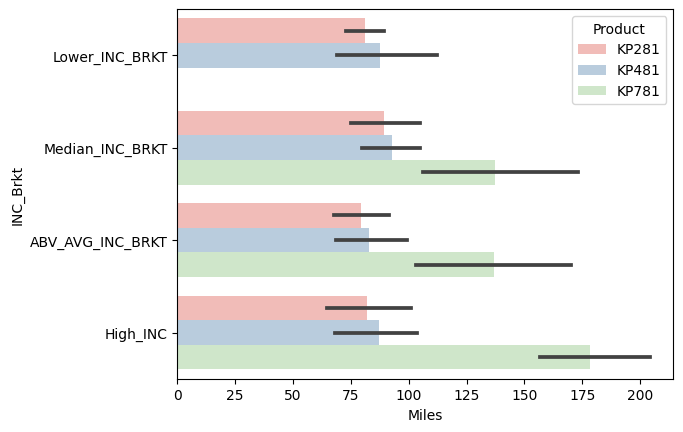

In [42]:
sns.barplot(df_cat,hue="Product",x="Miles",y="INC_Brkt",palette=np.random.choice(sns_color_pal))

<Axes: xlabel='Miles', ylabel='INC_Brkt'>

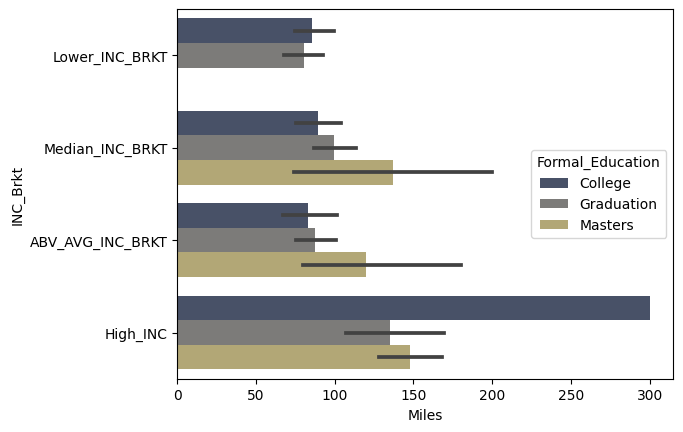

In [43]:
sns.barplot(df_cat,hue="Formal_Education",x="Miles",y="INC_Brkt",palette=np.random.choice(sns_color_pal))

<Axes: xlabel='Miles', ylabel='Fitness_BRKT'>

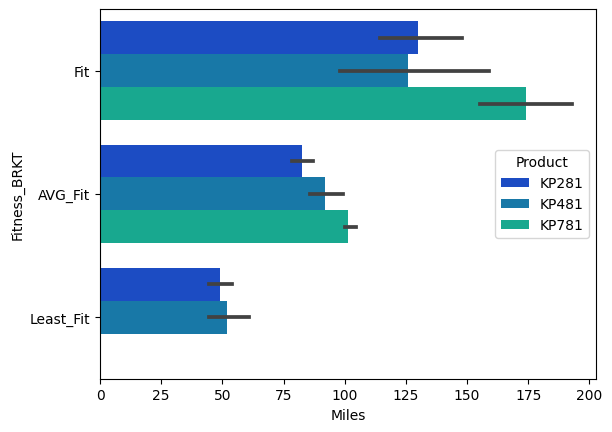

In [44]:
sns.barplot(df_cat,hue="Product",x="Miles",y="Fitness_BRKT",palette=np.random.choice(sns_color_pal))

<Axes: xlabel='Product', ylabel='Miles'>

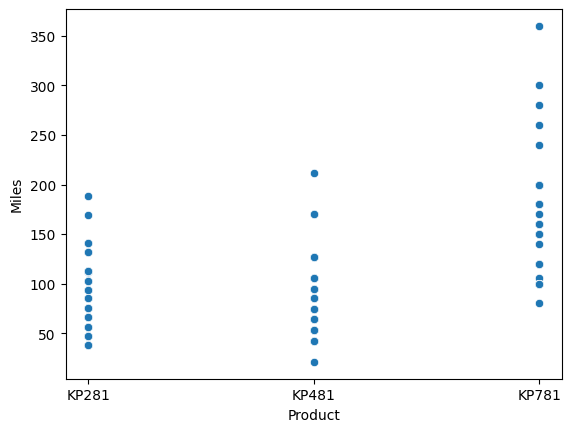

In [45]:
sns.scatterplot(data=df_numerics,
                x = "Product",
                y = "Miles")

#### Histograms, Box Plots and Outlier Analysis

<Axes: xlabel='Age', ylabel='Count'>

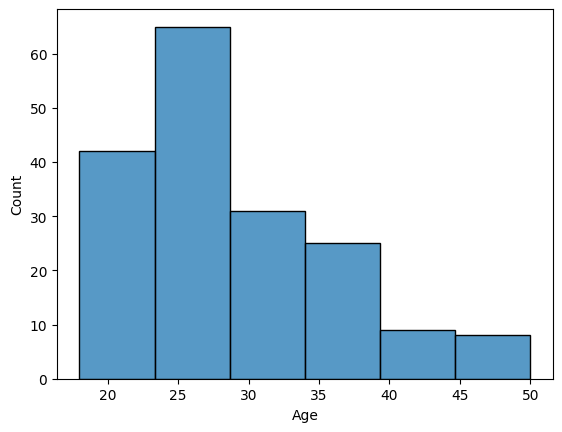

In [46]:
sns.histplot(df["Age"], bins=6)

<Axes: xlabel='Fitness', ylabel='Count'>

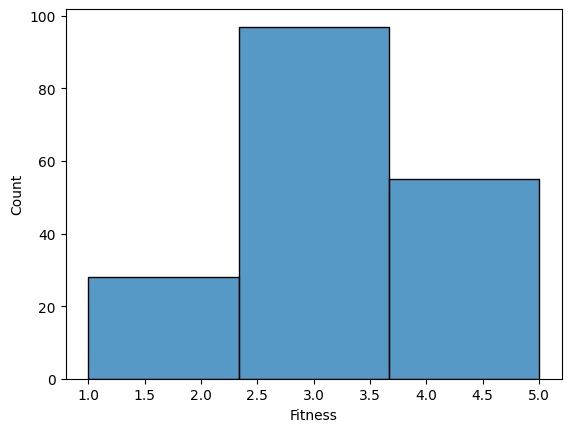

In [47]:
sns.histplot(df["Fitness"], bins=3)

<Axes: xlabel='Education'>

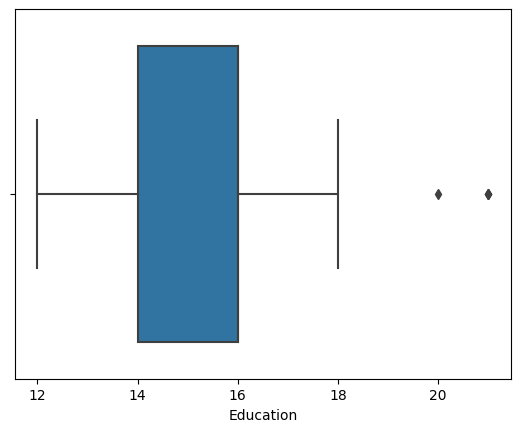

In [48]:
sns.boxplot(x=df_numerics["Education"])

<Axes: xlabel='Fitness'>

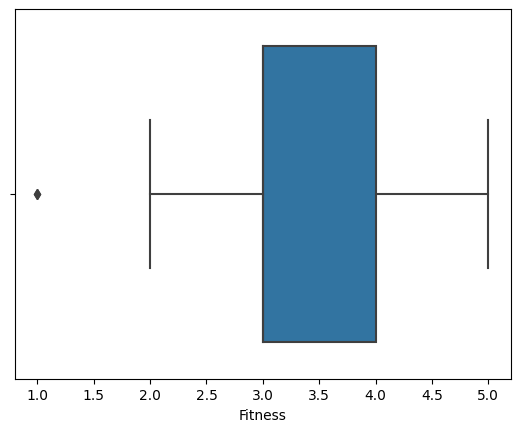

In [49]:
sns.boxplot(x=df_numerics["Fitness"])

<Axes: xlabel='Income'>

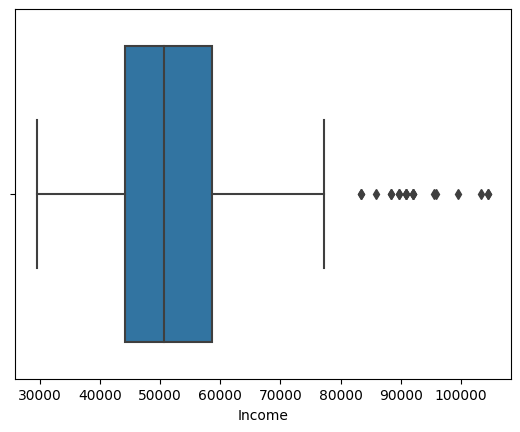

In [50]:
sns.boxplot(x=df_numerics["Income"])

<Axes: xlabel='Miles'>

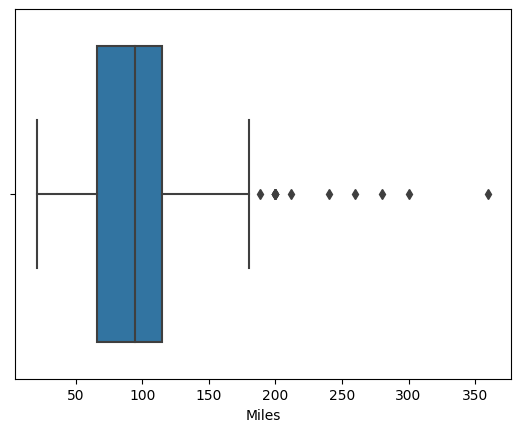

In [51]:
sns.boxplot(x=df_numerics["Miles"])

#### Correlation Analysis

In [52]:
df_cat.columns

Index(['Product', 'Gender', 'MaritalStatus', 'Formal_Education', 'Age_Brkt',
       'INC_Brkt', 'Fitness_BRKT', 'Miles', 'Income'],
      dtype='object')

In [53]:
df_numerics.columns

Index(['Product', 'Gender', 'Education', 'Usage', 'Fitness', 'Income',
       'Miles'],
      dtype='object')

d:\py_envs\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


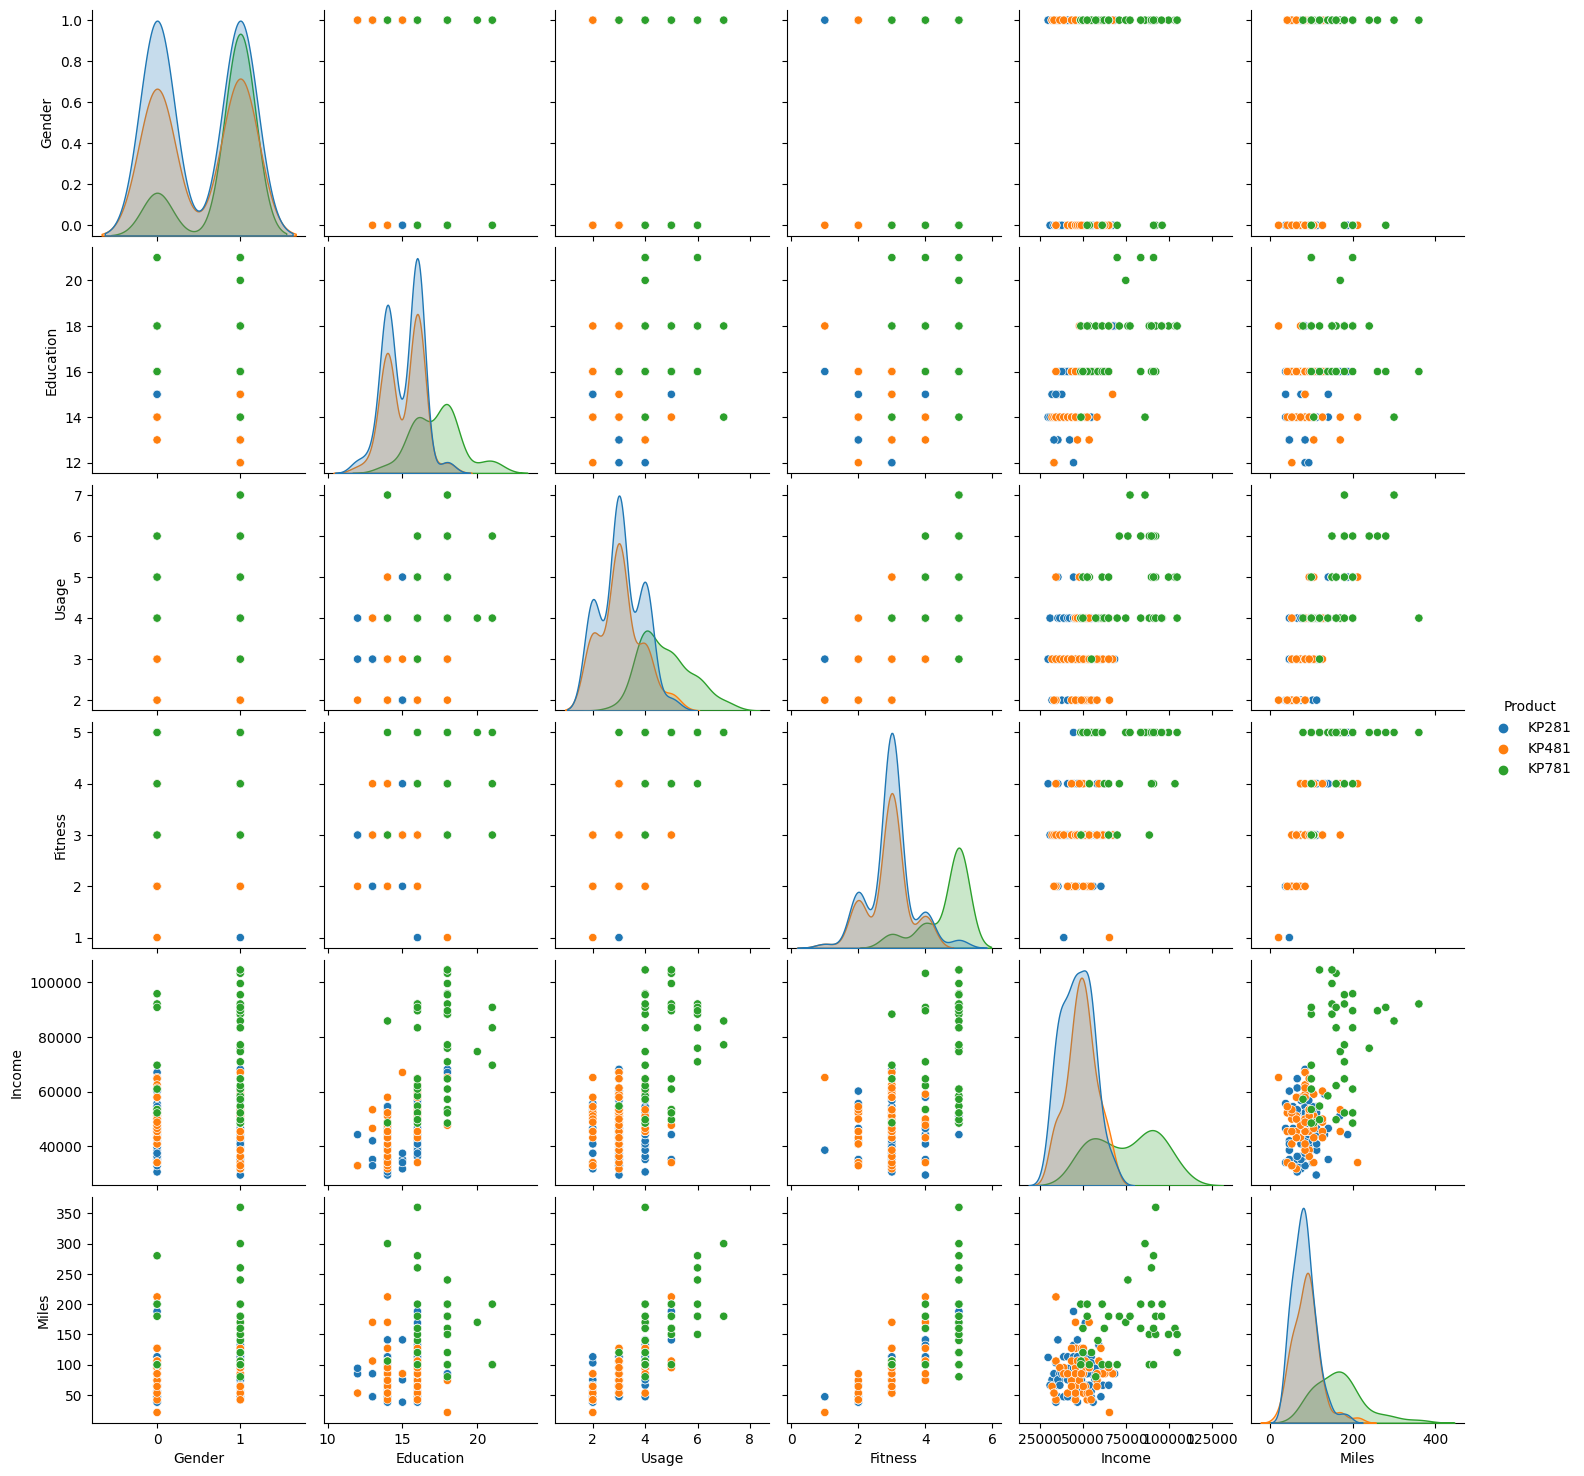

In [54]:
sns.pairplot(data=df_numerics, hue="Product")

In [60]:
Measures = ["Gender","Education","Usage","Fitness","Income","Miles"]

<Axes: >

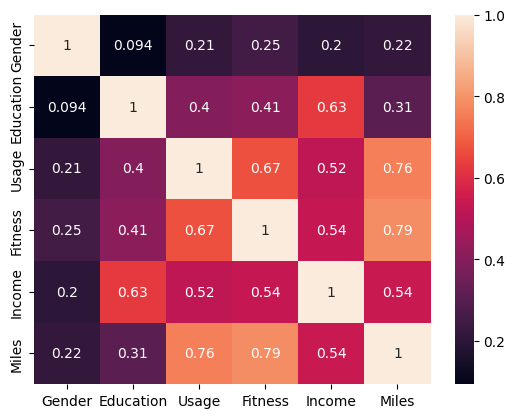

In [61]:
sns.heatmap(df_numerics[Measures].corr(), annot=True)

In [58]:
df_numerics

,Product,Gender,Education,Usage,Fitness,Income,Miles
0,KP281,1,14,3,4,29562,112
1,KP281,1,15,2,3,31836,75
2,KP281,0,14,4,3,30699,66
3,KP281,1,12,3,3,32973,85
4,KP281,1,13,4,2,35247,47
...,...,...,...,...,...,...,...
175,KP781,1,21,6,5,83416,200
176,KP781,1,18,5,4,89641,200
177,KP781,1,16,5,5,90886,160
178,KP781,1,18,4,5,104581,120


In [64]:
# sns.heatmap(df_numerics[Measures].corr(), annot=True)

In [66]:
df_cat.groupby(["Product","Gender","Fitness_BRKT"])[["Miles","Income"]].sum().div(len(df))

Miles        Income
Product Gender Fitness_BRKT                         
KP281   Female AVG_Fit       11.438889   6544.066667
               Fit            2.716667   1073.833333
               Least_Fit      2.777778   2608.783333
        Male   AVG_Fit       13.333333   7453.666667
               Fit            5.222222   1705.500000
               Least_Fit      1.305556   1244.383333
KP481   Female AVG_Fit        8.894444   5097.550000
               Fit            3.000000    972.766667
               Least_Fit      2.177778   1878.333333
        Male   AVG_Fit       11.061111   5722.900000
               Fit            2.594444   1137.000000
               Least_Fit      1.583333   1516.000000
KP781   Female AVG_Fit        0.555556    387.338889
               Fit            6.444444   2476.200000
        Male   AVG_Fit        1.700000   1121.083333
               Fit           28.388889  12780.172222

## Conclusions

##### Metrics Used

Education : 

* 18 Years - Masters 
* 16 Years - Graduation
* 14 Years - First Year

Salary Bracket:

* Upto 44058.75 (Lower_INC_BRKT)
* 44058 to 50596.50 (Median_INC_BRKT)
* 50596 to 58668.00 (ABV_AVG_INC_BRKT)
* More than 58668 (High Income Bracket)

Fitness Score: 

* Fitness Score 2.0 -- Least Fit 
* Fitness Score 3.0 -- AVG_FIT
* Fitness Score 4.0 -- Fit 


##### Observations 

* Overall KP781 has seen much more miles than the other two products, so KP781 products need to be focused on Longevity and being used for longer duration in a go. 
* Men and Women, on an average, run the most on KP781, while almost similar on the other two, however, KP281 is used more by men than women. 
* People in the Median Income Bracket (upto 50K) and Above Average Income Bracket (50 - 60 K) have the similar usage of KP781, however, as the income bracket goes higher, less and less people prefer the KP281, compared to the other two products. 
* In the Median and Above Average Income Brackets, People with higher years of education, tend to make more miles, compared to lower years of education. 
* However, In the High Income Bracket, people in College seem to be more active compared to Seniors. 
* Also, There is an opportunity to sell the expensive KP481 to the median and above average people who are out of college.  
* Fit people, with fitness core more than 4, tend to prefer the KP781 more, which is much more than double of Average fit people. So, Fit people, can be positioned the Higher End Products, most of the time. 
* The KP781 should be focused to be more long lasting. The other two products can be sold interchangeably. 

* In Terms of outliers, below are the ones:

    * People with more than 18 years of Education. 
    * People with less than 2 in Fitness Scores.
    * People with Above 80k Income and 200 Miles


